In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
doctors=pd.read_csv('doctors.csv')

***EDA***

In [3]:
doctors.head()

,Doctor Name,City,Specialization,Doctor Qualification,Experience(Years),Total_Reviews,Patient Satisfaction Rate(%age),Avg Time to Patients(mins),Wait Time(mins),Hospital Address,Doctors Link,Fee(PKR)
0,Prof. Dr. Syed Shamsuddin,QUETTA,Dermatologist,"MBBS, MCPS, FCPS",30.0,827.0,98.0,14.0,13.0,"National Hospital, Near Quetta Laboratory Prin...",https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
1,Dr. Jaffar Ali,QUETTA,Dermatologist,"MBBS, MCPS (Dermatology), FDV (Austria)",32.0,1250.0,97.0,16.0,13.0,"Quetta Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,3000.0
2,Asst. Prof. Dr. Syed Bilal Shams,QUETTA,"Dermatologist, Cosmetic Surgeon","MBBS, FCPS (Dermatology), Fellowship In Dermat...",15.0,1294.0,99.0,15.0,15.0,Skin Center Dermatologist Dr. Syed Bilal Ahmed...,https://www.marham.pk/doctors/quetta/dermatolo...,5000.0
3,Asst. Prof. Dr. Surjeet Kumar,QUETTA,Dermatologist,"MBBS, FCPS(Dermatology)",12.0,114.0,99.0,14.0,7.0,"Doctors Hospital, Quetta City, Quetta",https://www.marham.pk/doctors/quetta/dermatolo...,2000.0
4,Dr. Palwasha Jalil,QUETTA,Dermatologist,"MBBS, FCPS (Dermatology) Agha Khan University",8.0,24.0,100.0,19.0,16.0,"Aria Institute Of Medical And Health Sciences,...",https://www.marham.pk/doctors/quetta/dermatolo...,1500.0


In [4]:
doctors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2652 non-null   object 
 1   City                             2652 non-null   object 
 2   Specialization                   2652 non-null   object 
 3   Doctor Qualification             2652 non-null   object 
 4   Experience(Years)                2652 non-null   float64
 5   Total_Reviews                    2652 non-null   float64
 6   Patient Satisfaction Rate(%age)  2652 non-null   float64
 7   Avg Time to Patients(mins)       2652 non-null   float64
 8   Wait Time(mins)                  2652 non-null   float64
 9   Hospital Address                 2652 non-null   object 
 10  Doctors Link                     2652 non-null   object 
 11  Fee(PKR)                         2652 non-null   float64
dtypes: float64(6), objec

In [5]:
print(doctors.describe())

       Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
count        2652.000000    2652.000000                      2652.000000   
mean           11.736614      88.780543                        96.635370   
std             8.697953     273.881604                         5.064071   
min             1.000000       0.000000                        33.000000   
25%             6.000000       0.000000                        94.000000   
50%            10.000000       8.000000                        98.000000   
75%            14.000000      52.000000                       100.000000   
max            53.000000    5147.000000                       100.000000   

       Avg Time to Patients(mins)  Wait Time(mins)      Fee(PKR)  
count                 2652.000000      2652.000000   2652.000000  
mean                    14.069382        11.279789   1195.286953  
std                      2.738526         5.760870    828.151462  
min                      3.000000         0.000

In [6]:
# Check for missing values in the dataset
print(doctors.isnull().sum())

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee(PKR)                           0
dtype: int64


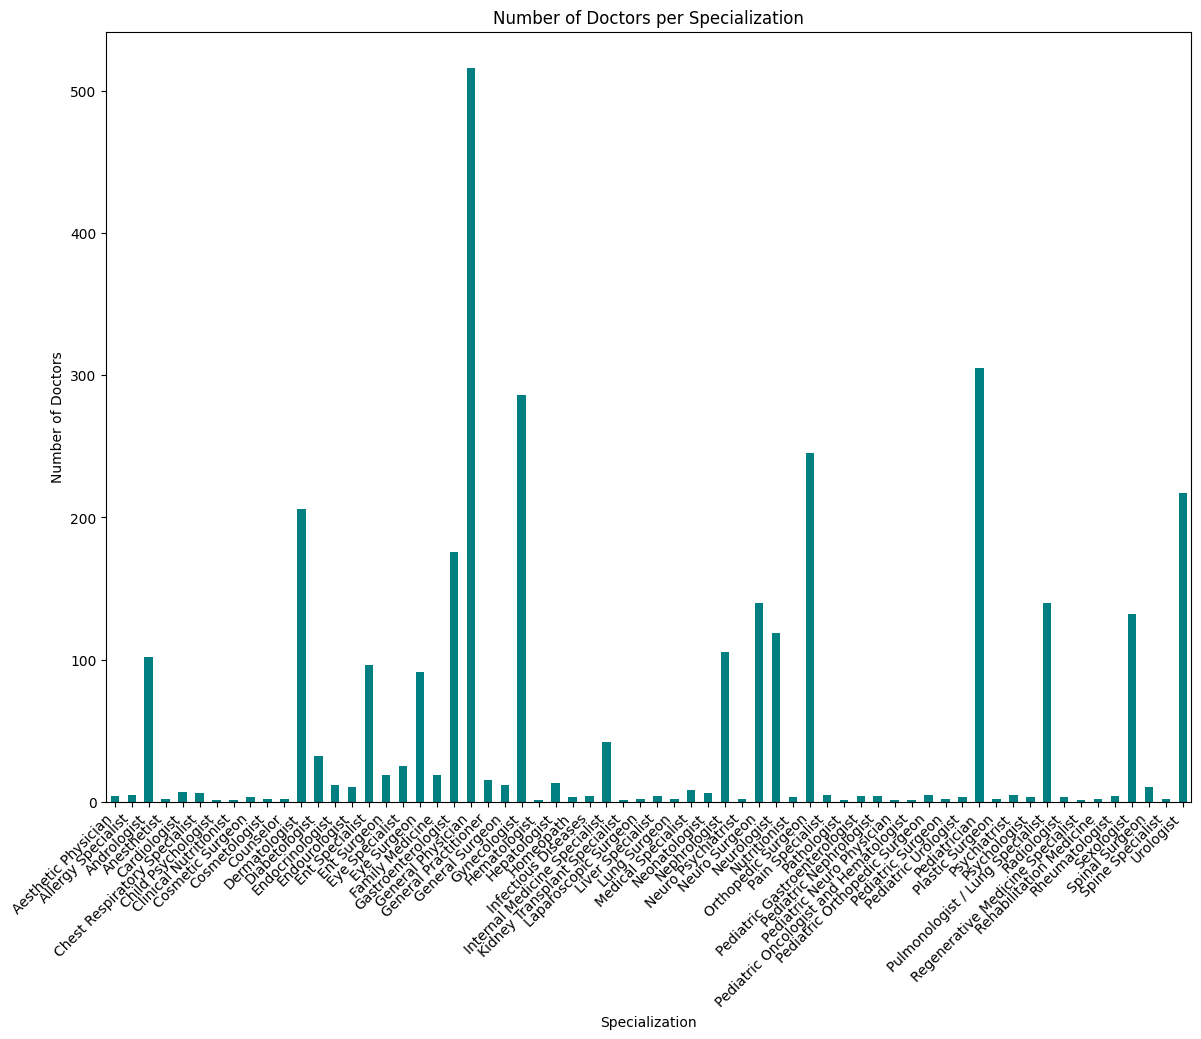

In [7]:
# Split the 'Specialization' entries and expand them into a list
specializations = doctors['Specialization'].str.split(',').explode()

# Count occurrences of each specialization
specialization_counts = specializations.value_counts()

# Clean up any leading/trailing whitespace that might affect counting
specialization_counts.index = specialization_counts.index.str.strip()
specialization_counts = specialization_counts.groupby(level=0).sum()

# Create a bar chart
plt.figure(figsize=(14, 10))  # Increased figure size for better spacing
specialization_counts.plot(kind='bar', color='teal')
plt.title('Number of Doctors per Specialization')  # Add a title
plt.xlabel('Specialization')  # Label the x-axis
plt.ylabel('Number of Doctors')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [8]:
# Set the option to display up to 500 rows (adjust number as needed)
pd.set_option('display.max_rows', 500)

# Ensure specialization_counts is sorted in descending order
specialization_counts_sorted = specialization_counts.sort_values(ascending=False)

# Print the sorted specialization counts
print(specialization_counts_sorted)


Specialization
General Physician                        516
Pediatrician                             305
Gynecologist                             286
Orthopedic Surgeon                       245
Urologist                                217
Dermatologist                            206
Gastroenterologist                       176
Pulmonologist / Lung Specialist          140
Neuro Surgeon                            140
Sexologist                               132
Neurologist                              119
Nephrologist                             105
Andrologist                              102
Ent Specialist                            96
Eye Surgeon                               91
Internal Medicine Specialist              42
Diabetologist                             32
Eye Specialist                            25
Ent Surgeon                               19
Family Medicine                           19
General Practitioner                      15
Hepatologist                            